In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_excel('./testSet_v1.3.xlsx')



In [85]:
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"


In [2]:
df

,query,sql,natural_answer
0,경주시 37세 남자 서비스 혜택 알고 싶어요.,"SELECT benefit_summary, benefit_details, keywo...",경주시의 37세 남성에게 적합한 서비스 혜택으로는 가축 사육 및 축산시설물을 운영하...
1,현재 받을 수 있는 지원금은 무엇이 있나요?,SELECT * FROM benefits WHERE start_date <= CUR...,현재 받을 수 있는 지원금에는 다음과 같은 것이 있습니다:\n\n1. **수산업경영...
2,장애인을 위한 지원 혜택에는 어떤 것이 있나요?,"SELECT benefit_summary, benefit_details, keywo...",장애인을 위한 지원 혜택에는 여러 가지가 있습니다. 주요 지원 내용은 다음과 같습니...
3,한부모 가정을 대상으로 하는 지원금은 무엇인가요?,"SELECT benefit_summary, benefit_details, keywo...",한부모 가정을 위한 다양한 지원금 및 혜택이 있습니다. 다음은 해당 지원금 목록입니...
4,청년층을 위한 생활안정 지원은 어떤 프로그램이 있나요?,"SELECT benefit_summary, benefit_details, keywo...","청년층을 위한 생활안정 지원 프로그램으로는 여러 가지가 있습니다. 예를 들어, 주택..."
...,...,...,...
6083,경상북도 상주시에 사는 22세 남자 농업인에 북한이탈주민가정이고 혜택 찾아줘. 사고...,"SELECT benefit_summary, benefit_details, keywo...",경상북도 상주시에 거주하는 22세 남자 농업인으로서 북한이탈주민 가정이라면 다양한 ...
6084,대전광역시 서구에 사는 24세 남자 농업인에 해당사항 없음이고 혜택 좀 알려주실래요...,"SELECT benefit_summary, benefit_details, keywo...","대전광역시 서구에 사는 24세 남자 농업인으로서 해당사항이 없는 경우, ""야생동물에..."
6085,제주특별자치도 서귀포시에 사는 63세 여자 임업인에 다문화가정이고 혜택 을 알려줘....,"SELECT benefit_summary, benefit_details, keywo...",제주특별자치도 서귀포시에 거주하는 63세 여성 임업인으로서 다문화가정의 혜택에 대해...
6086,인천광역시 중구에 사는 53세 남자 질병/질환자에 한부모가정/조손가정이고 혜택 알 ...,"SELECT benefit_summary, benefit_details, keywo...",인천광역시 중구에 사는 53세 남자 질병/질환자로서 한부모가정 또는 조손가정에 해당...


In [4]:
# 0번째 행의 sql 전체 보기
print(df['sql'].iloc[0])

SELECT benefit_summary, benefit_details, keywords FROM benefits WHERE area LIKE '%경주시%' AND min_age <= 37 AND max_age >= 37 AND (gender = '남자' OR gender = '') LIMIT 15;


select문으로 모든 열이 시작함

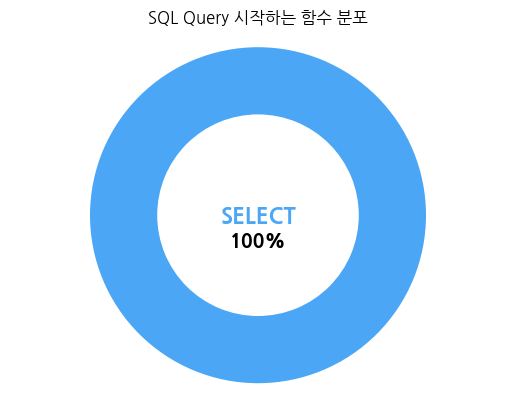

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import koreanize_matplotlib

# 쿼리 유형 분류 함수
def get_query_type(sql):
    sql = str(sql).strip().lower()
    if sql.startswith('select'):
        return 'SELECT'
    elif sql.startswith('insert'):
        return 'INSERT'
    elif sql.startswith('update'):
        return 'UPDATE'
    elif sql.startswith('delete'):
        return 'DELETE'
    else:
        return 'OTHER'

# ✅ 누락된 부분: query_type 컬럼 생성
df['query_type'] = df['sql'].apply(get_query_type)

# 유형별 쿼리 수
query_counts = df['query_type'].value_counts()

# 색상 지정
colors = ['#4BA6F6']

# ✅ 수정
wedges, texts = plt.pie(
    query_counts,
    labels=[""],
    autopct=None,
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

# 도넛 중앙 텍스트
plt.text(0, 0, 'SELECT', ha='center', va='center', fontsize=16, fontweight='bold', color='#4BA6F6')
plt.text(0, -0.15, '100%', ha='center', va='center', fontsize=14, fontweight='bold', color='black')

# 라벨 & 퍼센트 텍스트 색상 설정
for t in texts:
    t.set_color('#000000')
    t.set_fontweight('bold')

# for a in autotexts:
#     a.set_color('#000000')
#     a.set_fontweight('bold')

plt.title('SQL Query 시작하는 함수 분포')
plt.axis('equal')
plt.show()


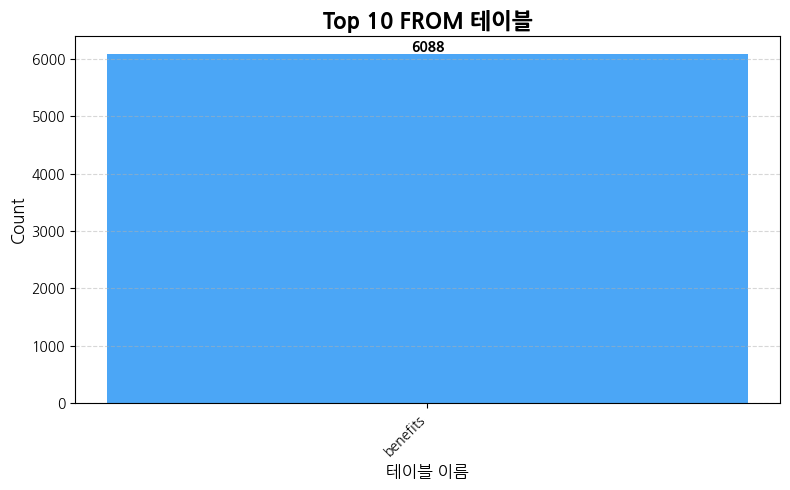

In [39]:
import matplotlib.pyplot as plt
import re

# FROM 뒤 테이블명 추출 함수
def extract_from_table(sql):
    sql = str(sql).lower()
    # 괄호 안에 있는 서브쿼리는 제거 (복잡한 쿼리 방지)
    sql = re.sub(r'\(.*?\)', '', sql)

    # from 다음 나오는 테이블 이름 추출 (alias 고려)
    match = re.search(r'from\s+([a-zA-Z0-9_\.]+)', sql)
    return match.group(1) if match else None


# 테이블명 추출
df['from_table'] = df['sql'].apply(extract_from_table)

# 데이터 계산
from_counts = df['from_table'].value_counts().head(10)

# 스타일 지정
plt.figure(figsize=(8, 5))
bars = plt.bar(from_counts.index, from_counts.values, color='#4BA6F6')

# 타이틀 및 라벨
plt.title('Top 10 FROM 테이블', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('테이블 이름', fontsize=12)

# 눈금 및 그리드
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# bar 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 여백 조정
plt.tight_layout()

# 시각화
plt.show()



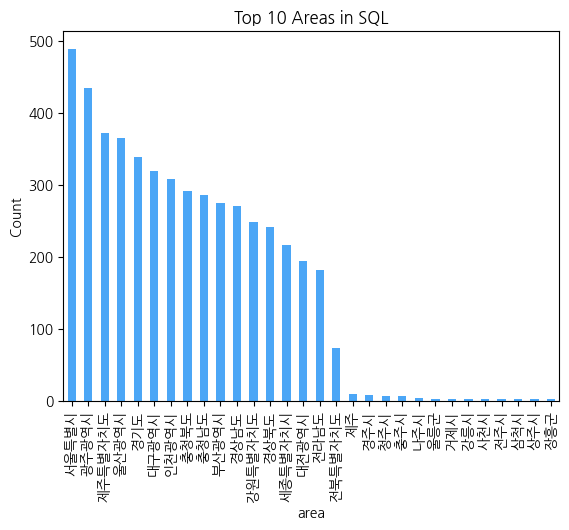

In [42]:
# where절에서 가장 많이 쓰임

import koreanize_matplotlib

def extract_area_like(sql):
    match = re.search(r"area\s+LIKE\s+'%(.+?)%'", sql)
    return match.group(1) if match else None

df['area'] = df['sql'].apply(extract_area_like)
df['area'].value_counts().head(30).plot(kind='bar', title='Top 10 Areas in SQL', color = '#4BA6F6')

plt.ylabel('Count')
plt.show()


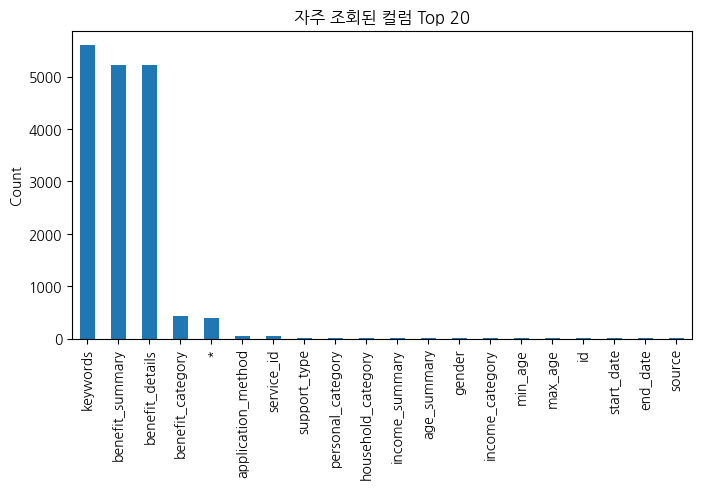

In [43]:
def extract_selected_columns(sql):
    match = re.search(r'select\s+(.*?)\s+from', sql, re.IGNORECASE | re.DOTALL)
    if match:
        columns = match.group(1)
        return [col.strip().split()[-1] for col in columns.split(',')]
    return []

df['selected_columns'] = df['sql'].apply(extract_selected_columns)
from itertools import chain
flat_columns = list(chain.from_iterable(df['selected_columns']))
pd.Series(flat_columns).value_counts().head(20).plot(kind='bar', figsize=(8, 4), title='자주 조회된 컬럼 Top 20')
plt.ylabel('Count')
plt.show()


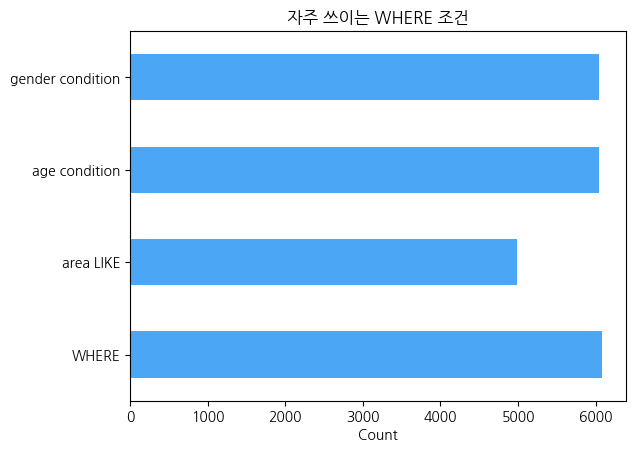

In [ ]:
def extract_where_clause(sql):
    match = re.search(r'where\s+(.*)', sql, re.IGNORECASE)
    return match.group(1) if match else None

df['has_where'] = df['sql'].str.contains(r'\bwhere\b', flags=re.IGNORECASE)
df['has_area'] = df['sql'].str.contains(r"area\s+like", flags=re.IGNORECASE)
df['has_age'] = df['sql'].str.contains(r"age|min_age|max_age", flags=re.IGNORECASE)
df['has_gender'] = df['sql'].str.contains(r"gender", flags=re.IGNORECASE)
df['where_clause'] = df['sql'].apply(extract_where_clause)

condition_counts = {
    'WHERE': df['has_where'].sum(),
    'area LIKE': df['has_area'].sum(),
    'age condition': df['has_age'].sum(),
    'gender condition': df['has_gender'].sum(),
}

pd.Series(condition_counts).plot(kind='barh', color='#4BA6F6', title='자주 쓰이는 WHERE 조건')
plt.xlabel('Count')
plt.show()


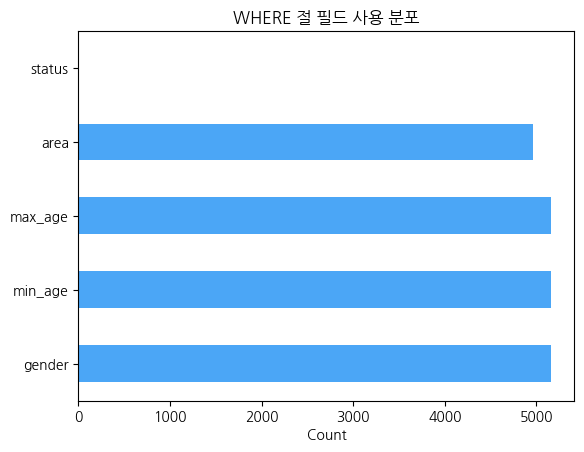

In [48]:
def extract_where_clause(sql):
    match = re.search(r'where\s+(.*)', sql, re.IGNORECASE)
    return match.group(1) if match else None

df['where_clause'] = df['sql'].apply(extract_where_clause)

# 예: 어떤 필드명이 조건에 많이 등장하는지
keywords = ['area', 'gender', 'min_age', 'max_age', 'status']
for key in keywords:
    df[f'has_{key}'] = df['where_clause'].str.contains(fr'\b{key}\b', na=False)

# 분포 시각화
counts = {key: df[f'has_{key}'].sum() for key in keywords}
pd.Series(counts).sort_values(ascending=False).plot(kind='barh', color='#4BA6F6', title='WHERE 절 필드 사용 분포')
plt.xlabel('Count')
plt.show()


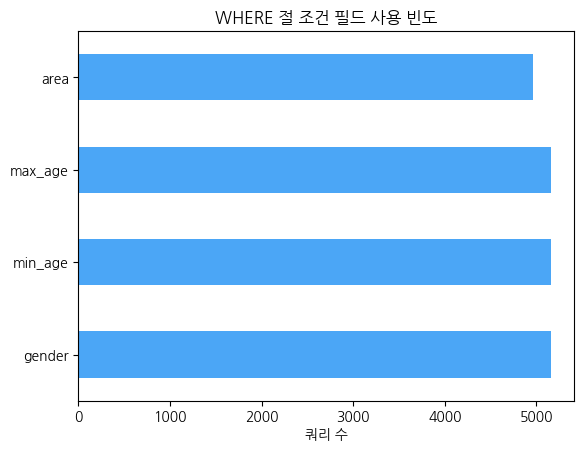

In [53]:
def extract_where_clause(sql):
    match = re.search(r'where\s+(.*)', sql, re.IGNORECASE)
    return match.group(1).lower() if match else None

df['where_clause'] = df['sql'].apply(extract_where_clause)

keywords = ['area', 'gender', 'min_age', 'max_age']

for key in keywords:
    df[f'has_{key}'] = df['where_clause'].str.contains(fr'\b{key}\b', na=False)

counts = {key: df[f'has_{key}'].sum() for key in keywords}
pd.Series(counts).sort_values(ascending=False).plot(kind='barh', color='#4BA6F6', title='WHERE 절 조건 필드 사용 빈도')
plt.xlabel('쿼리 수')
plt.show()



In [50]:
df[df['has_min_age'] | df['has_max_age'] | df['has_age']]['sql'].head(3).tolist()


["SELECT benefit_summary, benefit_details, keywords FROM benefits WHERE area LIKE '%경주시%' AND min_age <= 37 AND max_age >= 37 AND (gender = '남자' OR gender = '') LIMIT 15;",
 'SELECT benefit_summary, benefit_details, keywords FROM benefits WHERE min_age <= 39 AND max_age >= 19 LIMIT 15;',
 'SELECT benefit_summary, benefit_details, keywords FROM benefits WHERE min_age >= 65 OR max_age >= 65 LIMIT 15;']

In [ ]:
df['where_clause'] = df['sql'].apply(extract_where_clause)

# 나이 조건이 있는 쿼리인지 체크
df['has_min_age'] = df['where_clause'].str.contains(r'\bmin_age\b', na=False)
df['has_max_age'] = df['where_clause'].str.contains(r'\bmax_age\b', na=False)
df['has_age'] = df['where_clause'].str.contains(r'\bage\b', na=False)

# 조건 조합: 나이 관련된 거
df_age_cond = df[df['has_min_age'] | df['has_max_age']]

# 개수 확인
print("나이 조건 포함된 쿼리 개수:", len(df_age_cond))


나이 조건 포함된 쿼리 개수: 5159


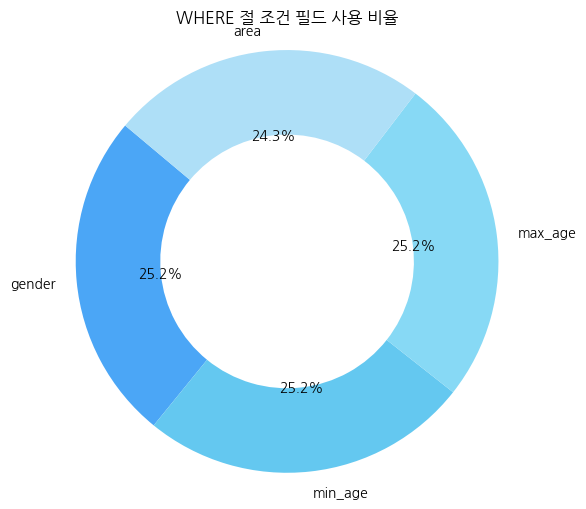

In [55]:
counts = {key: df[f'has_{key}'].sum() for key in ['area', 'gender', 'min_age', 'max_age']}
series = pd.Series(counts).sort_values(ascending=False)


labels = series.index
sizes = series.values

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4BA6F6', '#64C8F0', '#87D9F5', '#AEDFF7'],
    wedgeprops=dict(width=0.4)
)

plt.title('WHERE 절 조건 필드 사용 비율')
plt.axis('equal')
plt.show()


In [56]:
# SELECT 절에서 컬럼 추출하는 함수
def extract_selected_columns(sql):
    sql = str(sql).lower()
    match = re.search(r'select\s+(.*?)\s+from', sql, re.DOTALL)
    if match:
        columns = match.group(1)
        return [col.strip().split()[-1] for col in columns.split(',')]
    return []

# 컬럼 리스트 추출
df['selected_columns'] = df['sql'].apply(extract_selected_columns)
flat_columns = [col for sublist in df['selected_columns'] for col in sublist]

In [ ]:
print(column_counter.most_common(20))

[('keywords', 5601), ('benefit_summary', 5223), ('benefit_details', 5223), ('benefit_category', 422), ('*', 393), ('application_method', 54), ('service_id', 39), ('support_type', 17), ('household_category', 8), ('personal_category', 8), ('income_summary', 6), ('age_summary', 4), ('gender', 3), ('income_category', 3), ('min_age', 2), ('max_age', 2), ('id', 1), ('start_date', 1), ('end_date', 1), ('source', 1)]


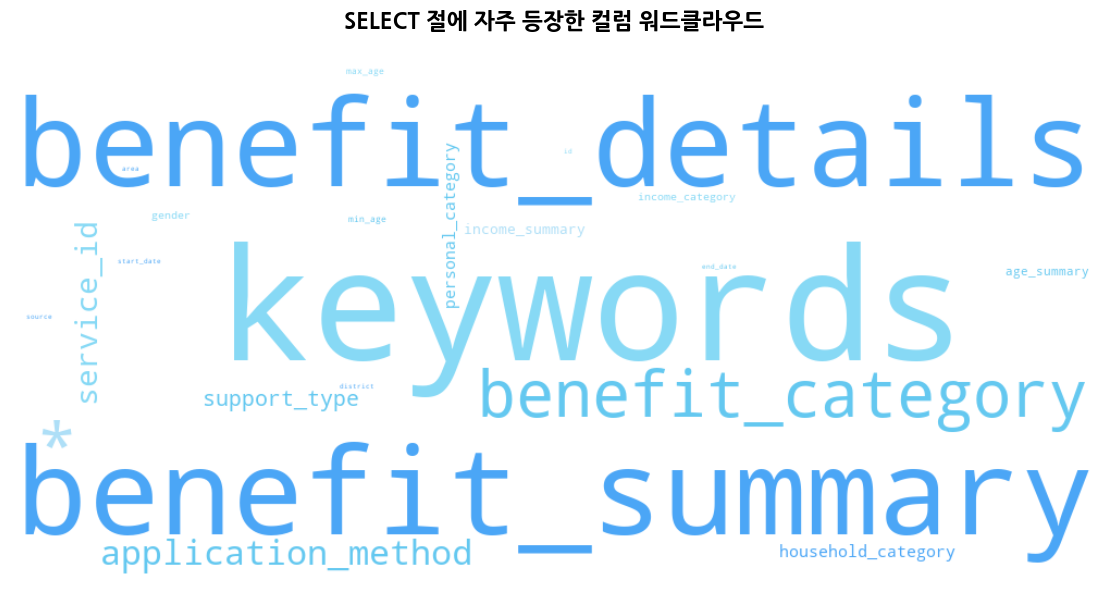

In [ ]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# 👉 SELECT 절 컬럼 추출 함수
def extract_selected_columns(sql):
    sql = str(sql).lower()
    match = re.search(r'select\s+(.*?)\s+from', sql, re.DOTALL)
    if match:
        columns = match.group(1)
        return [col.strip().split()[-1] for col in columns.split(',')]
    return []

# 👉 컬럼 리스트 추출
df['selected_columns'] = df['sql'].apply(extract_selected_columns)
flat_columns = [col for sublist in df['selected_columns'] for col in sublist]

# 👉 컬럼명 빈도수 계산
column_counter = Counter(flat_columns)

# 👉 사용자 정의 색상 팔레트
custom_colors = ['#4BA6F6', '#64C8F0', '#87D9F5', '#AEDFF7']

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(custom_colors)

# 👉 워드클라우드 생성
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    color_func=custom_color_func,
    font_path=None  # 한글 포함 시 폰트 지정 필요
).generate_from_frequencies(column_counter)

# 👉 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('SELECT 절에 자주 등장한 컬럼 워드클라우드', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



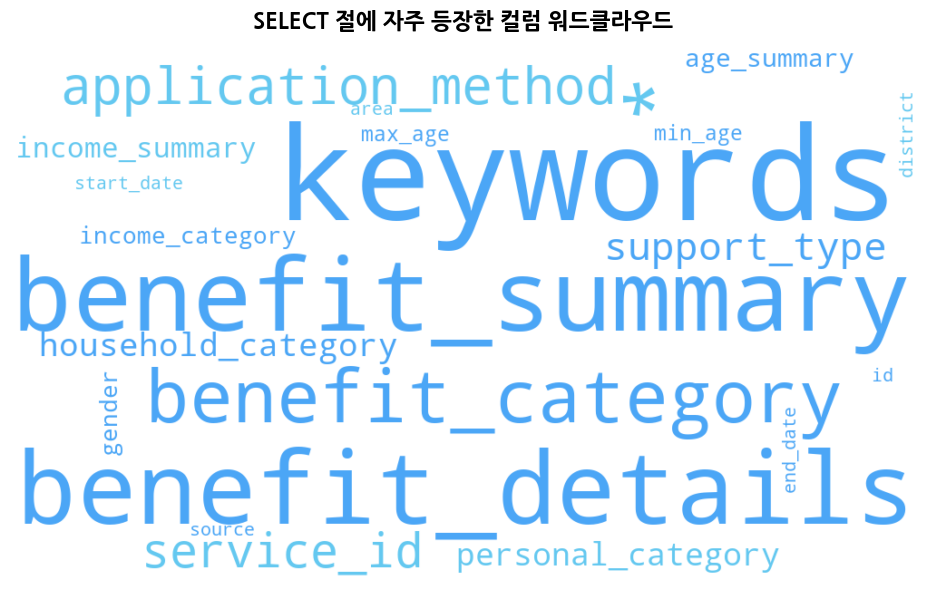

In [61]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# 👉 SELECT 절 컬럼 추출 함수
def extract_selected_columns(sql):
    sql = str(sql).lower()
    match = re.search(r'select\s+(.*?)\s+from', sql, re.DOTALL)
    if match:
        columns = match.group(1)
        return [col.strip().split()[-1] for col in columns.split(',')]
    return []

# 👉 컬럼 리스트 추출
df['selected_columns'] = df['sql'].apply(extract_selected_columns)
flat_columns = [col for sublist in df['selected_columns'] for col in sublist]

# 👉 컬럼명 빈도수 계산
column_counter = Counter(flat_columns)

# 👉 사용자 정의 색상 팔레트
custom_colors = ['#4BA6F6', '#64C8F0', ]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(custom_colors)
wordcloud = WordCloud(
    width=1000,
    height=600,
    max_words=100,
    background_color='white',
    color_func=custom_color_func,
    relative_scaling=0.3  # 0에 가까울수록 단어 크기 격차 줄어듦
).generate_from_frequencies(column_counter)

# 👉 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('SELECT 절에 자주 등장한 컬럼 워드클라우드', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


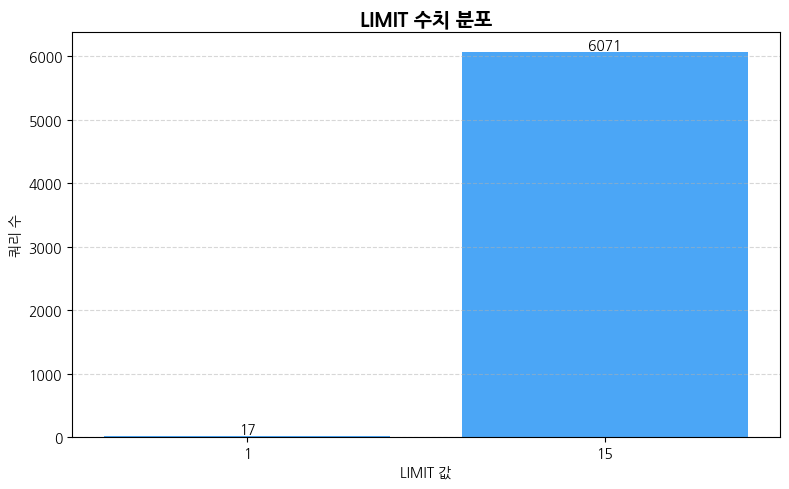

In [62]:
# 2. LIMIT 값 추출 함수
def extract_limit(sql):
    match = re.search(r'limit\s+(\d+)', str(sql), flags=re.IGNORECASE)
    return int(match.group(1)) if match else None

# 3. LIMIT 값 추출
df['limit'] = df['sql'].apply(extract_limit)

# 4. LIMIT 분포 집계
limit_counts = df['limit'].value_counts().sort_index()

# 5. 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(limit_counts.index.astype(str), limit_counts.values, color='#4BA6F6')

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height}', ha='center', va='bottom', fontsize=10)

plt.title('LIMIT 수치 분포', fontsize=14, fontweight='bold')
plt.xlabel('LIMIT 값')
plt.ylabel('쿼리 수')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

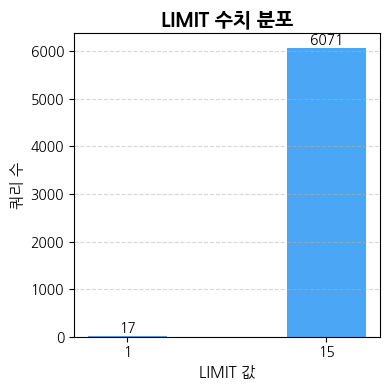

In [71]:
plt.figure(figsize=(4, 4))

bars = plt.bar(limit_counts.index.astype(str), limit_counts.values, 
               width=0.4,  # 👉 막대 두께 줄이기
               color='#4BA6F6')

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height}',
             ha='center', va='bottom', fontsize=10)

# 제목 및 스타일
plt.title('LIMIT 수치 분포', fontsize=14, fontweight='bold')
plt.xlabel('LIMIT 값', fontsize=11)
plt.ylabel('쿼리 수', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

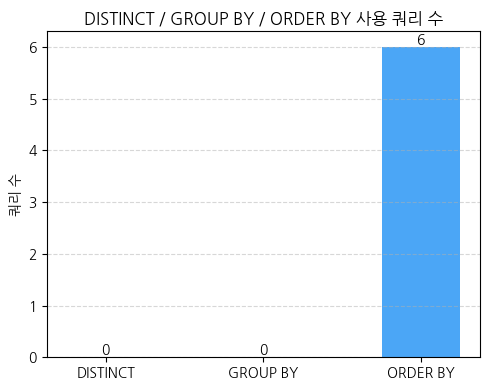

In [74]:
# 1. 키워드 존재 여부 컬럼 생성
df['has_distinct'] = df['sql'].str.contains(r'\bdistinct\b', flags=re.IGNORECASE)
df['has_group_by'] = df['sql'].str.contains(r'\bgroup by\b', flags=re.IGNORECASE)
df['has_order_by'] = df['sql'].str.contains(r'\border by\b', flags=re.IGNORECASE)

# 2. 각각 몇 개 쿼리에 포함됐는지 카운트
usage_counts = {
    'DISTINCT': df['has_distinct'].sum(),
    'GROUP BY': df['has_group_by'].sum(),
    'ORDER BY': df['has_order_by'].sum(),
}

# 3. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
bars = plt.bar(usage_counts.keys(), usage_counts.values(), color='#4BA6F6', width=0.5)

# 막대 위 텍스트
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height , f'{height}', ha='center', va='bottom', fontsize=10)

plt.title('DISTINCT / GROUP BY / ORDER BY 사용 쿼리 수')
plt.ylabel('쿼리 수')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [76]:
# ORDER BY 쿼리 예시 몇 개 보기
df[df['has_order_by']]['sql']

2853    SELECT service_id\nFROM benefits\nWHERE area L...
2969    SELECT service_id\nFROM benefits\nWHERE area L...
3115    SELECT service_id\nFROM benefits\nWHERE area L...
3148    SELECT benefit_category, keywords\nFROM benefi...
3186    SELECT benefit_category, keywords\nFROM benefi...
3371    SELECT service_id\nFROM benefits\nWHERE area L...
Name: sql, dtype: object

/var/folders/rq/d16rcqmd0zq22tym017mhb4m0000gn/T/ipykernel_20261/492392074.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_join'] = df['sql'].str.contains(r'\b(join|left join|right join|inner join|outer join)\b', flags=re.IGNORECASE)


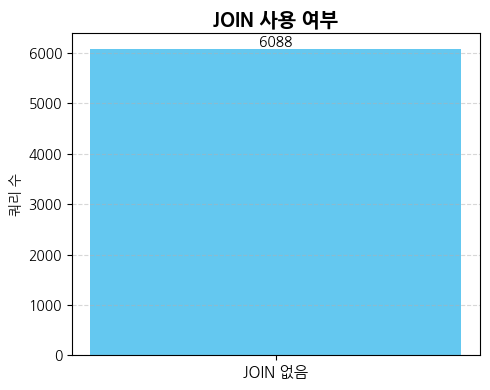

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. JOIN 사용 여부 컬럼 만들기
df['has_join'] = df['sql'].str.contains(r'\b(join|left join|right join|inner join|outer join)\b', flags=re.IGNORECASE)

# 2. 사용 비율 계산
join_counts = df['has_join'].value_counts().rename({True: 'JOIN 있음', False: 'JOIN 없음'})

# 3. 시각화
plt.figure(figsize=(5, 4))
bars = plt.bar(join_counts.index, join_counts.values, color=['#64C8F0', '#4BA6F6'], width=0.5)

# 바 위 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height}', ha='center', va='bottom', fontsize=10)

# 제목 및 스타일
plt.title('JOIN 사용 여부', fontsize=14, fontweight='bold')
plt.ylabel('쿼리 수')
plt.xticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


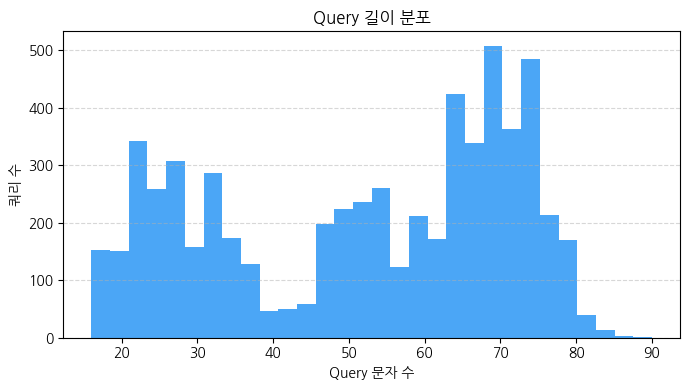

In [78]:
df['query_length'] = df['query'].str.len()

plt.figure(figsize=(7, 4))
plt.hist(df['query_length'], bins=30, color='#4BA6F6')
plt.title('Query 길이 분포')
plt.xlabel('Query 문자 수')
plt.ylabel('쿼리 수')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


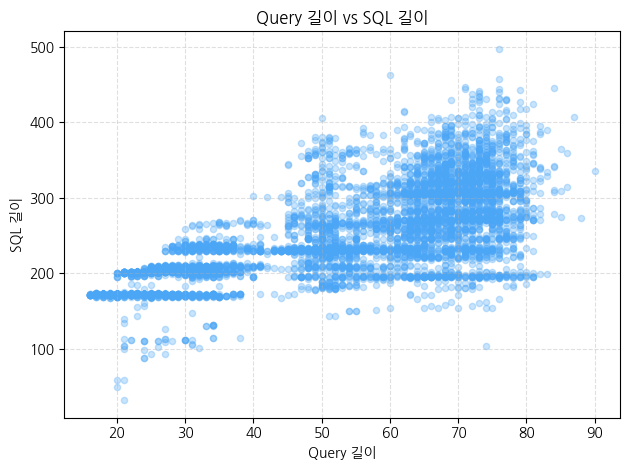

In [79]:
df['sql_length'] = df['sql'].str.len()

df.plot.scatter(x='query_length', y='sql_length', alpha=0.3, color='#4BA6F6')
plt.title('Query 길이 vs SQL 길이')
plt.xlabel('Query 길이')
plt.ylabel('SQL 길이')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


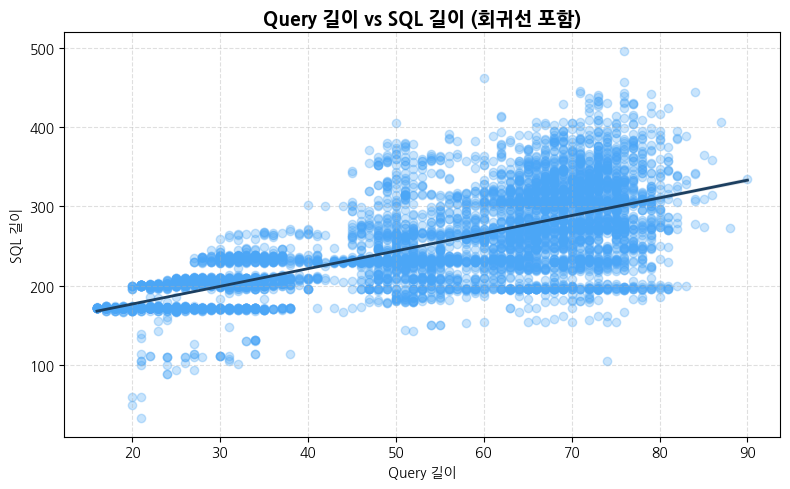

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일로 그리기
plt.figure(figsize=(8, 5))

# 산점도 + 회귀선 그리기
sns.regplot(
    x='query_length',
    y='sql_length',
    data=df,
    scatter_kws={'alpha': 0.3, 'color': '#4BA6F6'},
    line_kws={'color': '#1C3F60', 'linewidth': 2},
)

plt.title('Query 길이 vs SQL 길이 (회귀선 포함)', fontsize=14, fontweight='bold')
plt.xlabel('Query 길이')
plt.ylabel('SQL 길이')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [81]:
df['query_has_woman'] = df['query'].str.contains('여성|여자', na=False)
df['sql_has_gender'] = df['sql'].str.contains("gender\s*=\s*'여자'", flags=re.IGNORECASE)

# 교차표 확인
pd.crosstab(df['query_has_woman'], df['sql_has_gender'], rownames=['Query에 여성 있음'], colnames=['SQL에 gender 조건 있음'])


SQL에 gender 조건 있음,False,True
Query에 여성 있음,,
False,2919,0
True,28,3141
